In [1]:
import garminconnect
import os
import numpy as np
from getpass import getpass
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Login and get Garmin Connect statistics

In [2]:
def login_and_process_garth():
    # Prompt user for email and password
    email = input("Enter email address: ")
    password = getpass("Enter password: ")

    try:
        # Create a Garmin Connect instance and log in
        garmin = garminconnect.Garmin(email, password)
        garmin.login()

        # Retrieve the display name
        display_name = garmin.display_name
        print(f"Logged in as: {display_name}")

        # Retrieve the value of the GARTH_HOME environment variable
        GARTH_HOME = os.path.expanduser(os.getenv("GARTH_HOME", "~/.garth"))

        # Process the path using garmin.garth.dump
        garmin.garth.dump(GARTH_HOME)
        
        return garmin


        print(f"Data dumped to {GARTH_HOME}")
    except Exception as e:
        # Handle exceptions (e.g., login failure, network issues)
        print(f"An error occurred: {e}")
        
        return None

# Create weekly dataframe

In [3]:
def get_two_weeks_sleep_data(garmin, end_date):
    # Calculate the start date as 2 weeks (14 days) before the end date
    start_date = end_date - timedelta(days=14)

    datelist = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
    datelist_new = [x.isoformat() for x in datelist]

    dataframes_list = []  # List to store each day's DataFrame

    for day in datelist_new:
        try:
            current_entry = garmin.get_sleep_data(day)
            current_entry_df = pd.DataFrame([current_entry])  # Convert the dictionary to a DataFrame
            dataframes_list.append(current_entry_df)
        except Exception as e:
            print(f"Error retrieving data for {day}: {e}")

    # Concatenate all the DataFrames in the list
    return pd.concat(dataframes_list, ignore_index=True)

In [4]:
def save_dataframe_to_json(df, filename):
    """
    Save the given DataFrame to a JSON file in the user's local directory.

    Args:
    df (pandas.DataFrame): The DataFrame to be saved.
    filename (str): The name of the file to save the DataFrame to.

    Returns:
    str: The path to the saved file.
    """
    # Ensure that the filename has a .json extension
    if not filename.endswith('.json'):
        filename += '.json'

    # Create the full path to the file
    file_path = os.path.join(os.getcwd(), filename)

    # Save the DataFrame as JSON
    df.to_json(file_path, orient='records', lines=True)

    return file_path

In [6]:
garmin_instance = login_and_process_garth()

if garmin_instance:
    end_date = date(2023, 10, 17)
    week_sleep_df = get_two_weeks_sleep_data(garmin_instance, end_date)

    # Save the DataFrame as JSON
    saved_file_path = save_dataframe_to_json(week_sleep_df, 'week_sleep_data.json')
    print(f"Data saved to {saved_file_path}")
else:
    print("Failed to log in or process Garmin data.")

Enter email address: liza.kaladjian@study.hs-duesseldorf.de
Enter password: ········
Logged in as: a5e356c2-9047-4022-ad14-5c47e8db1166
Data saved to C:\Users\lizak\Data_Science\Semester_5\Digital_Health\Garmin_Watch\week_sleep_data.json


In [8]:
def load_json_to_dataframe(filepath):
    """
    Load a JSON file into a pandas DataFrame.

    Args:
    filepath (str): The path to the JSON file.

    Returns:
    pandas.DataFrame: The loaded DataFrame.
    """
    # Read the JSON file into a DataFrame
    df = pd.read_json(filepath, orient='records', lines=True)

    return df

file_path = 'week_sleep_data.json'
week_sleep_df = load_json_to_dataframe(file_path)

week_sleep_df


dailySleepDTO  \
0   {'id': None, 'userProfilePK': 116790140, 'cale...   
1   {'id': None, 'userProfilePK': 116790140, 'cale...   
2   {'id': None, 'userProfilePK': 116790140, 'cale...   
3   {'id': 1696542000000, 'userProfilePK': 1167901...   
4   {'id': 1696633620000, 'userProfilePK': 1167901...   
5   {'id': None, 'userProfilePK': 116790140, 'cale...   
6   {'id': None, 'userProfilePK': 116790140, 'cale...   
7   {'id': 1696886880000, 'userProfilePK': 1167901...   
8   {'id': 1696975260000, 'userProfilePK': 1167901...   
9   {'id': 1697062860000, 'userProfilePK': 1167901...   
10  {'id': 1697150400000, 'userProfilePK': 1167901...   
11  {'id': 1697238540000, 'userProfilePK': 1167901...   
12  {'id': 1697321760000, 'userProfilePK': 1167901...   
13  {'id': 1697410140000, 'userProfilePK': 1167901...   
14  {'id': 1697492100000, 'userProfilePK': 1167901...   

                                        sleepMovement  remSleepData  \
0                                                  []           NaN   
1                                                  []           NaN   
2                                                  []           NaN   
3   [{'startGMT': '2023-10-05T20:40:00.0', 'endGMT...           1.0   
4   [{'startGMT': '2023-10-06T22:07:00.0', 'endGMT...           1.0   
5                                                  []           NaN   
6                                                  []           NaN   
7   [{'startGMT': '2023-10-09T20:28:00.0', 'endGMT...           1.0   
8   [{'startGMT': '2023-10-10T21:01:00.0', 'endGMT...           1.0   
9   [{'startGMT': '2023-10-11T21:21:00.0', 'endGMT...           1.0   
10  [{'startGMT': '2023-10-12T21:40:00.0', 'endGMT...           1.0   
11  [{'startGMT': '2023-10-13T22:09:00.0', 'endGMT...           1.0   
12  [{'startGMT': '2023-10-14T21:16:00.0', 'endGMT...           1.0   
13  [{'startGMT': '2023-10-15T21:49:00.0', 'endGMT...           1.0   
14  [{'startGMT': '2023-10-16T20:35:00.0', 'endGMT...           1.0   

                                          sleepLevels  \
0                                                  []   
1                                                  []   
2                                                  []   
3   [{'startGMT': '2023-10-05T21:40:00.0', 'endGMT...   
4   [{'startGMT': '2023-10-06T23:07:00.0', 'endGMT...   
5                                                  []   
6                                                  []   
7   [{'startGMT': '2023-10-09T21:28:00.0', 'endGMT...   
8   [{'startGMT': '2023-10-10T22:01:00.0', 'endGMT...   
9   [{'startGMT': '2023-10-11T22:21:00.0', 'endGMT...   
10  [{'startGMT': '2023-10-12T22:40:00.0', 'endGMT...   
11  [{'startGMT': '2023-10-13T23:09:00.0', 'endGMT...   
12  [{'startGMT': '2023-10-14T22:16:00.0', 'endGMT...   
13  [{'startGMT': '2023-10-15T22:49:00.0', 'endGMT...   
14  [{'startGMT': '2023-10-16T21:35:00.0', 'endGMT...   

                                 sleepRestlessMoments  restlessMomentsCount  \
0                                                None                   NaN   
1                                                None                   NaN   
2                                                None                   NaN   
3   [{'value': 1, 'startGMT': 1696542180000}, {'va...                  30.0   
4   [{'value': 1, 'startGMT': 1696633620000}, {'va...                  24.0   
5                                                None                   NaN   
6                                                None                   NaN   
7   [{'value': 1, 'startGMT': 1696887600000}, {'va...                  16.0   
8   [{'value': 1, 'startGMT': 1696977060000}, {'va...                  22.0   
9   [{'value': 1, 'startGMT': 1697065920000}, {'va...                  11.0   
10  [{'value': 1, 'startGMT': 1697154540000}, {'va...                  16.0   
11  [{'value': 2, 'startGMT': 1697239080000}, {'va...                  34.0   
12  [{'value': 1, 'startGMT': 1697322480000}, {'va

In [7]:
week_sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   dailySleepDTO                        15 non-null     object 
 1   sleepMovement                        15 non-null     object 
 2   remSleepData                         12 non-null     object 
 3   sleepLevels                          15 non-null     object 
 4   sleepRestlessMoments                 12 non-null     object 
 5   restlessMomentsCount                 12 non-null     float64
 6   wellnessEpochRespirationDataDTOList  12 non-null     object 
 7   sleepHeartRate                       12 non-null     object 
 8   sleepStress                          12 non-null     object 
 9   sleepBodyBattery                     12 non-null     object 
 10  hrvData                              12 non-null     object 
 11  avgOvernightHrv                   

In [8]:
week_sleep_df.columns

Index(['dailySleepDTO', 'sleepMovement', 'remSleepData', 'sleepLevels',
       'sleepRestlessMoments', 'restlessMomentsCount',
       'wellnessEpochRespirationDataDTOList', 'sleepHeartRate', 'sleepStress',
       'sleepBodyBattery', 'hrvData', 'avgOvernightHrv', 'hrvStatus',
       'restingHeartRate'],
      dtype='object')

 ## Exploring the columns

In [9]:
def normalize_and_rename_columns(df, column_name, prefix_to_remove=None):
    # Normalize the specified column
    expanded_df = pd.json_normalize(df[column_name])

    # Optionally remove a specified prefix from column names
    if prefix_to_remove:
        expanded_df.columns = [col.replace(prefix_to_remove + '.', '') for col in expanded_df.columns]

    return expanded_df

expanded_df = normalize_and_rename_columns(week_sleep_df, 'dailySleepDTO', 'dailySleepDTO')
expanded_df

id  userProfilePK calendarDate  sleepTimeSeconds  \
0            NaN      116790110   2023-10-03               NaN   
1            NaN      116790110   2023-10-04               NaN   
2            NaN      116790110   2023-10-05               NaN   
3   1.696549e+12      116790110   2023-10-06           27360.0   
4   1.696628e+12      116790110   2023-10-07           18480.0   
5   1.696720e+12      116790110   2023-10-08           19860.0   
6   1.696802e+12      116790110   2023-10-09           29520.0   
7   1.696901e+12      116790110   2023-10-10           24420.0   
8   1.696975e+12      116790110   2023-10-11           30960.0   
9   1.697066e+12      116790110   2023-10-12           22501.0   
10  1.697154e+12      116790110   2023-10-13           29280.0   
11  1.697243e+12      116790110   2023-10-14           24900.0   
12  1.697330e+12      116790110   2023-10-15           30660.0   
13  1.697412e+12      116790110   2023-10-16           27540.0   
14  1.697497e+12      116790110   2023-10-17           28920.0   

    napTimeSeconds sleepWindowConfirmed sleepWindowConfirmationType  \
0              NaN                 None                        None   
1              NaN                 None                        None   
2              NaN                 None                        None   
3              0.0                 True    enhanced_confirmed_final   
4              0.0                 True    enhanced_confirmed_final   
5              0.0                 True    enhanced_confirmed_final   
6              0.0                 True    enhanced_confirmed_final   
7              0.0                 True    enhanced_confirmed_final   
8              0.0                 True    enhanced_confirmed_final   
9              0.0                 True    enhanced_confirmed_final   
10             0.0                 True    enhanced_confirmed_final   
11             0.0                 True    enhanced_confirmed_final   
12             0.0                 True    enhanced_confirmed_final   
13             0.0                 True    enhanced_confirmed_final   
14             0.0                 True    enhanced_confirmed_final   

    sleepStartTimestampGMT  sleepEndTimestampGMT  sleepStartTimestampLocal  \
0                      NaN                   NaN                       NaN   
1                      NaN                   NaN                       NaN   
2                      NaN                   NaN                       NaN   
3             1.696549e+12          1.696577e+12              1.696556e+12   
4             1.696628e+12          1.696651e+12              1.696635e+12   
5             1.696720e+12          1.696742e+12              1.696727e+12   
6             1.696802e+12          1.696833e+12              1.696809e+12   
7             1.696901e+12          1.696926e+12              1.696908e+12   
8             1.696975e+12          1.697007e+12              1.696983e+12   
9             1.697066e+12          1.697091e+12              1.697073e+12   
10            1.697154e+12          1.697184e+12              1.697161e+12   
11            1.697243e+12          1.697268e+12              1.697250e+12   
12            1.697330e+12          1.697362e+12              1.697337e+12   
13            1.697412e+12          1.697440e+12              1.697419e+12   
14            1.697497e+12          1.697527e+12              1.697504e+12   

    ...  sleepScores.lightPercentage.idealStartInSeconds  \
0   ...                                              NaN   
1   ...                                              NaN   
2   ...                                              NaN   
3   ...                                           8208.0   
4   ...                                           5544.0   
5   ...                                           5958.0   
6   ...                                           8856.0   
7   ...                                           7326.0   
8   ...                        

In [10]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 66 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               12 non-null     float64
 1   userProfilePK                                    15 non-null     int64  
 2   calendarDate                                     15 non-null     object 
 3   sleepTimeSeconds                                 12 non-null     float64
 4   napTimeSeconds                                   12 non-null     float64
 5   sleepWindowConfirmed                             12 non-null     object 
 6   sleepWindowConfirmationType                      12 non-null     object 
 7   sleepStartTimestampGMT                           12 non-null     float64
 8   sleepEndTimestampGMT                             12 non-null     float64
 9   sleepStartTimestampLocal          

# Data Exploration

In [11]:
def process_column_data(df, column_name):
    """
    Function that unpacks the lists of data for a specific column into a single dataframe.
    """
    # Extract the specified column and drop rows with NaN
    a = pd.DataFrame.from_dict(df[column_name]).dropna(axis=0)

    # Create a list of DataFrames from the lists in the specified column
    dfs = [pd.DataFrame(lst) for lst in a[column_name] if lst]

    # Concatenate all the DataFrames to form the final DataFrame
    final_df = pd.concat(dfs, ignore_index=True)

    # final_df.set_index(['value', 'startGMT'], inplace=True)

    return final_df


# For 'sleepHeartRate' column
final_sleep_heart_rate_df = process_column_data(week_sleep_df, 'sleepHeartRate')
final_sleep_heart_rate_df

value       startGMT
0        57  1696549080000
1        54  1696549200000
2        53  1696549320000
3        53  1696549440000
4        53  1696549560000
...     ...            ...
2764     50  1697526720000
2765     53  1697526840000
2766     52  1697526960000
2767     53  1697527080000
2768     51  1697527200000

[2769 rows x 2 columns]

In [12]:
def convert_timestamps(df, timestamp_column, time_offset_hours=0):
    """
    Function that converts timestamps in a dataframe to a timezone-aware datetime format.
    """
    # Convert timestamp column to datetime
    df[timestamp_column] = pd.to_datetime(df[timestamp_column], unit='ms')

    # Convert GMT to local time by adding the specified number of hours
    local_time_column = "startLocal"
    df[local_time_column] = df[timestamp_column] + timedelta(hours=time_offset_hours)

    return df, local_time_column


In [13]:

def extract_and_filter_by_day(df, datetime_column):
    """
    Function that groups the data into days.
    """
    unique_days = df[datetime_column].dt.date.unique()
    day_dataframes = []

    for day in unique_days:
        # Filter data for the current day
        day_data = df[df[datetime_column].dt.date == day]
        day_dataframes.append(day_data)

    return unique_days, day_dataframes


In [14]:
def plot_heart_rate_during_sleep_phases(expanded_df, final_df):
    """
    Function that plots Heart Rate readings during sleep phases.
    """
    # Convert timestamp columns to datetime
    expanded_df["sleepEndTimestampLocal"] = pd.to_datetime(expanded_df["sleepEndTimestampLocal"], unit='ms')
    expanded_df["sleepStartTimestampLocal"] = pd.to_datetime(expanded_df["sleepStartTimestampLocal"], unit='ms')

    # Loop through each sleep phase
    for idx, row in expanded_df.iterrows():
        start_time = row['sleepStartTimestampLocal']
        end_time = row['sleepEndTimestampLocal']

        # Skip if any of the sleep phases is NaN
        if pd.isnull(start_time) or pd.isnull(end_time):
            continue

        # Filter the heart rate data for the current sleep phase
        phase_data = final_df[(final_df['startLocal'] >= start_time) & (final_df['startLocal'] <= end_time)]
        
        # Skip plotting if the phase_data is empty
        if phase_data.empty:
            continue

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(phase_data['startLocal'], phase_data['value'], marker='o', linestyle='-')
        
        # Formatting the x-axis for better visualization
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
        plt.gcf().autofmt_xdate()

        # Setting title and labels
        plt.title(f'Heart Rate from {start_time} to {end_time}')
        plt.xlabel('Time')
        plt.ylabel('Heart Rate (BPM)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Heart Rate Plots

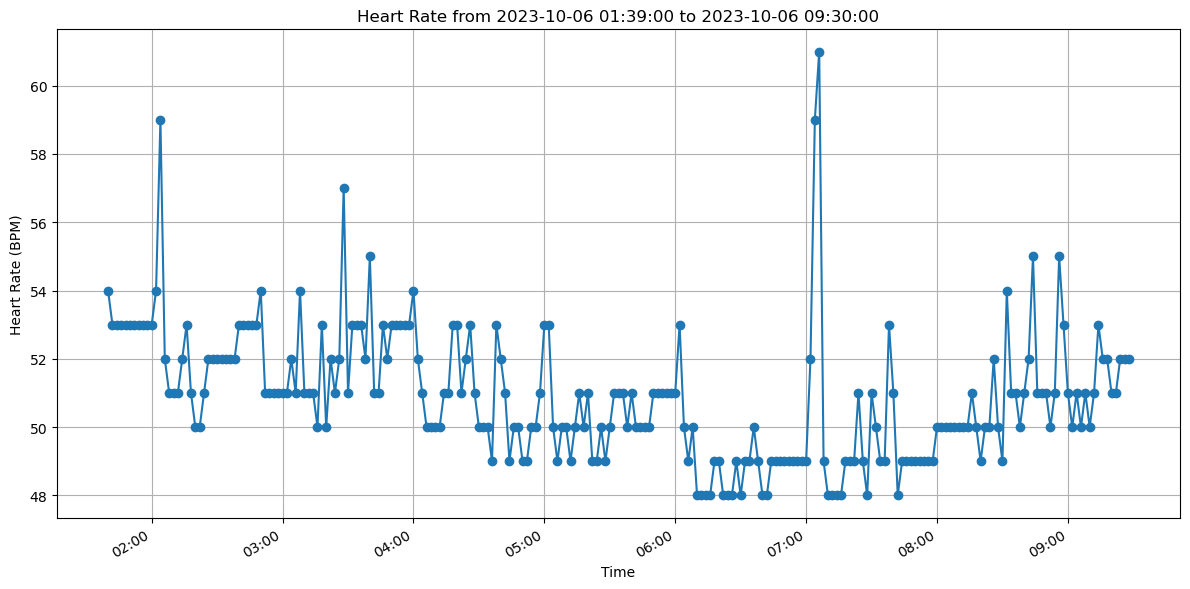

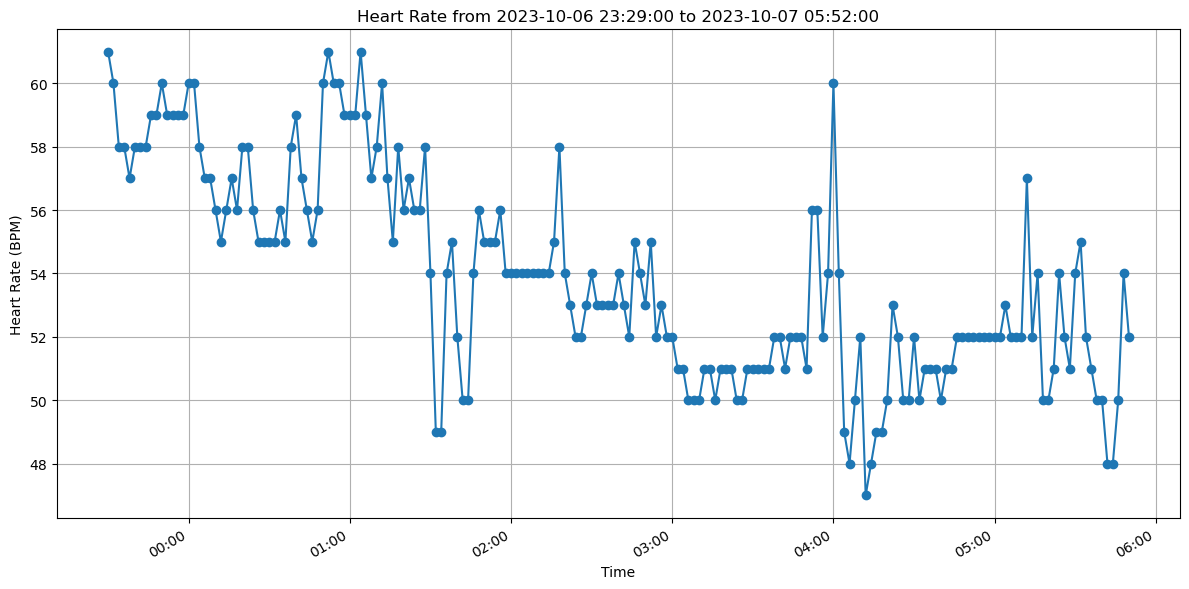

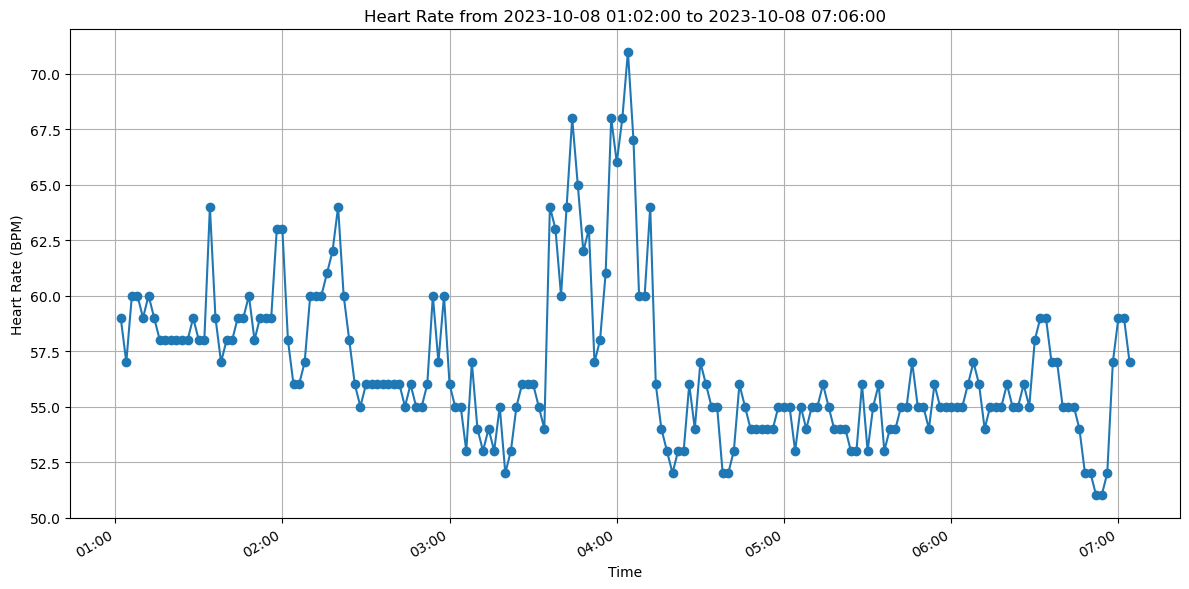

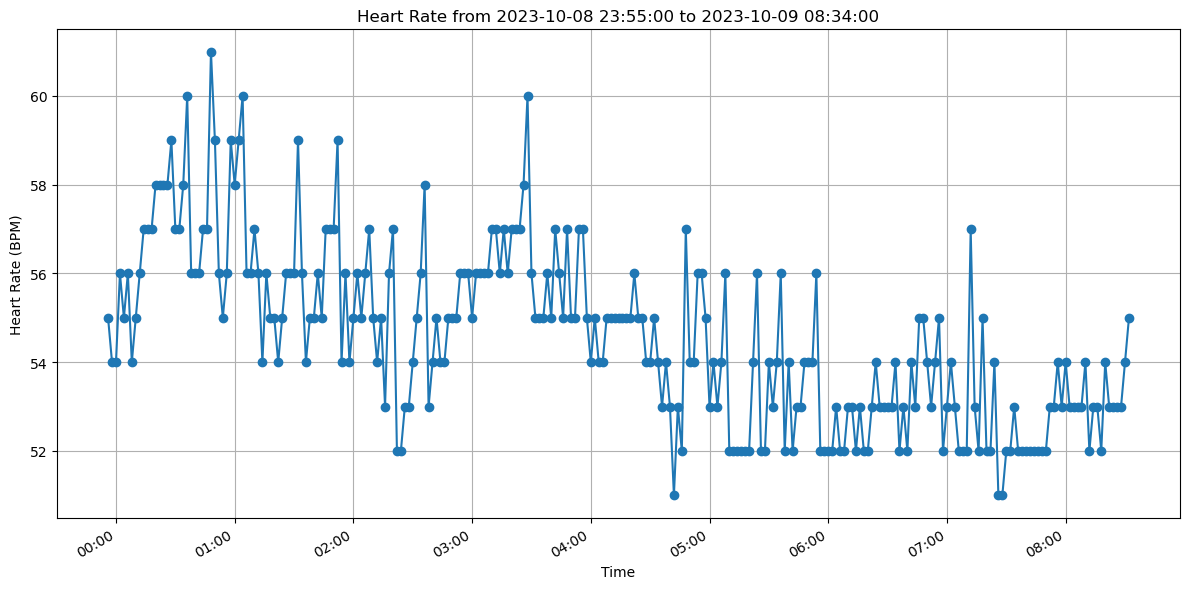

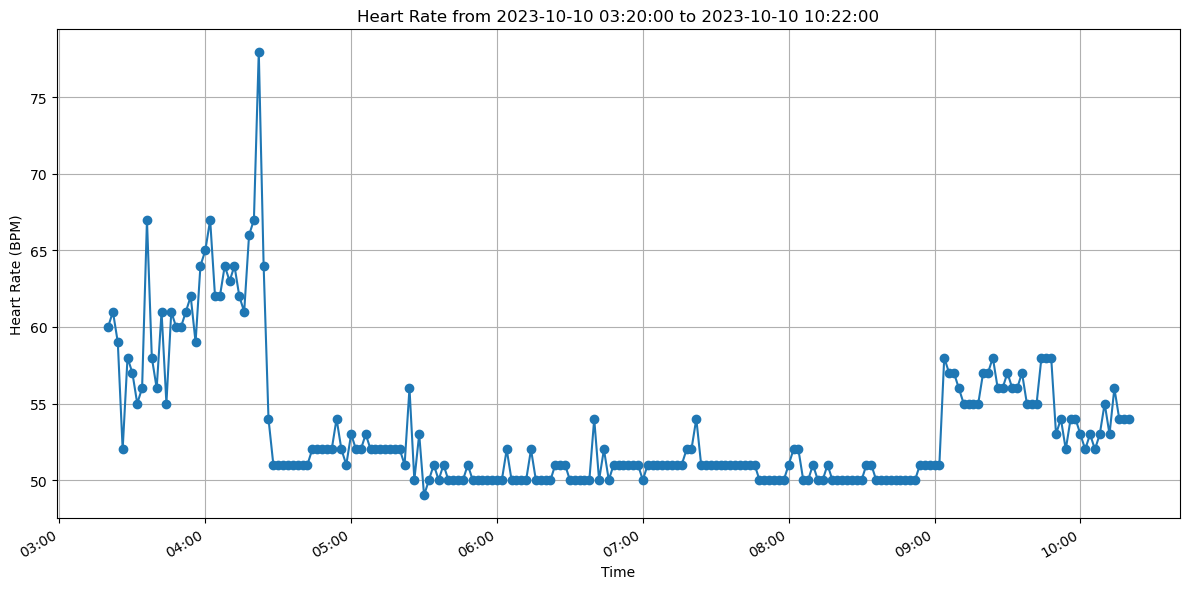

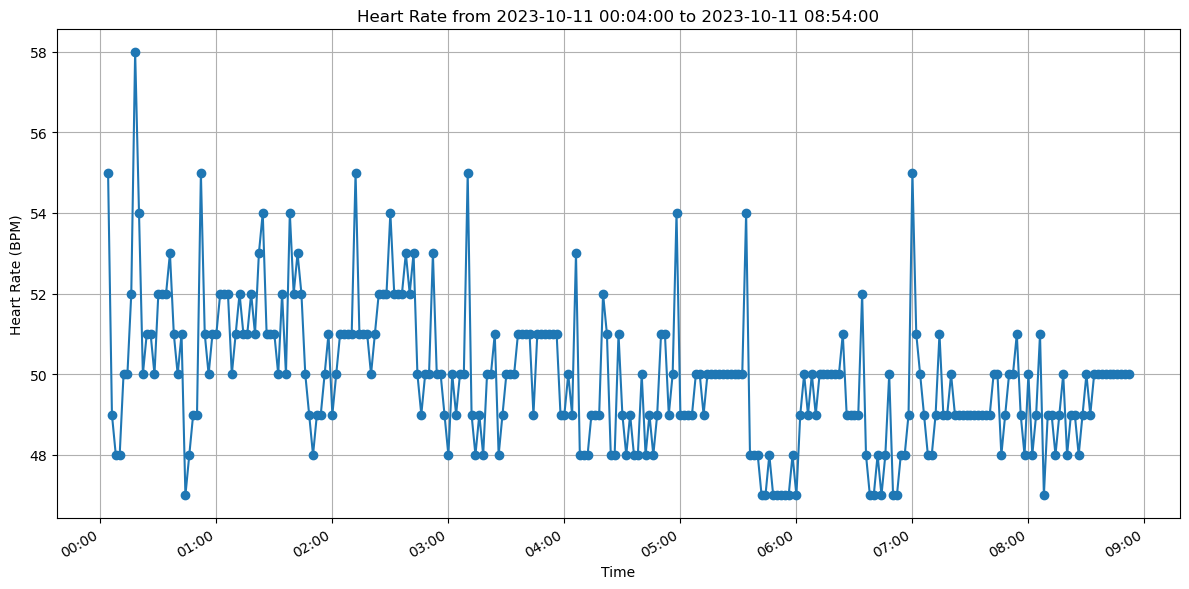

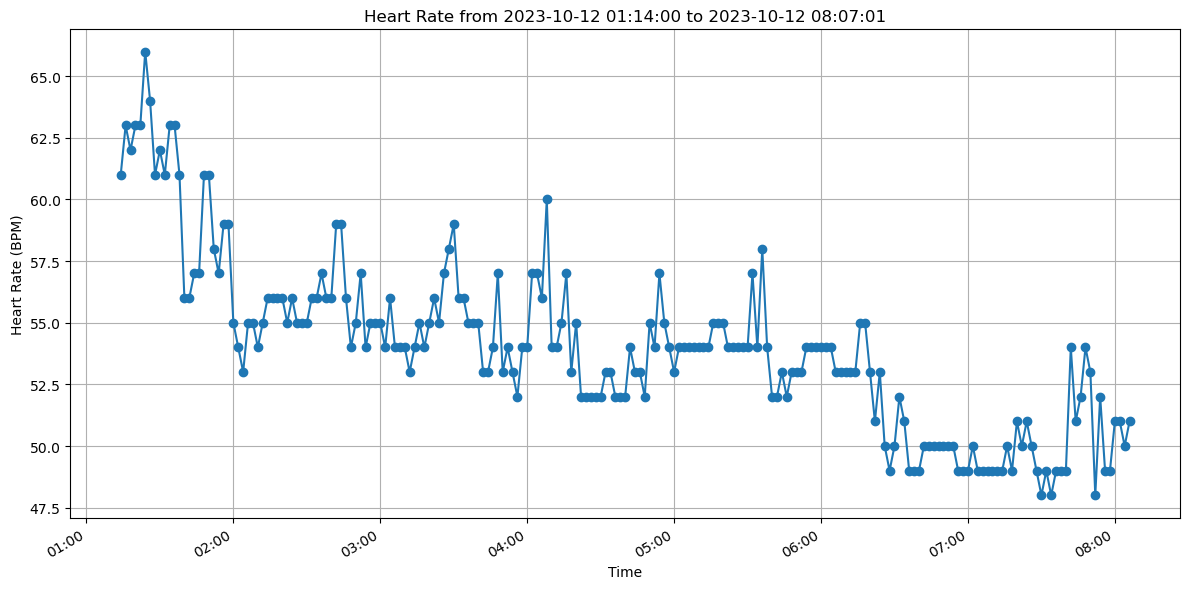

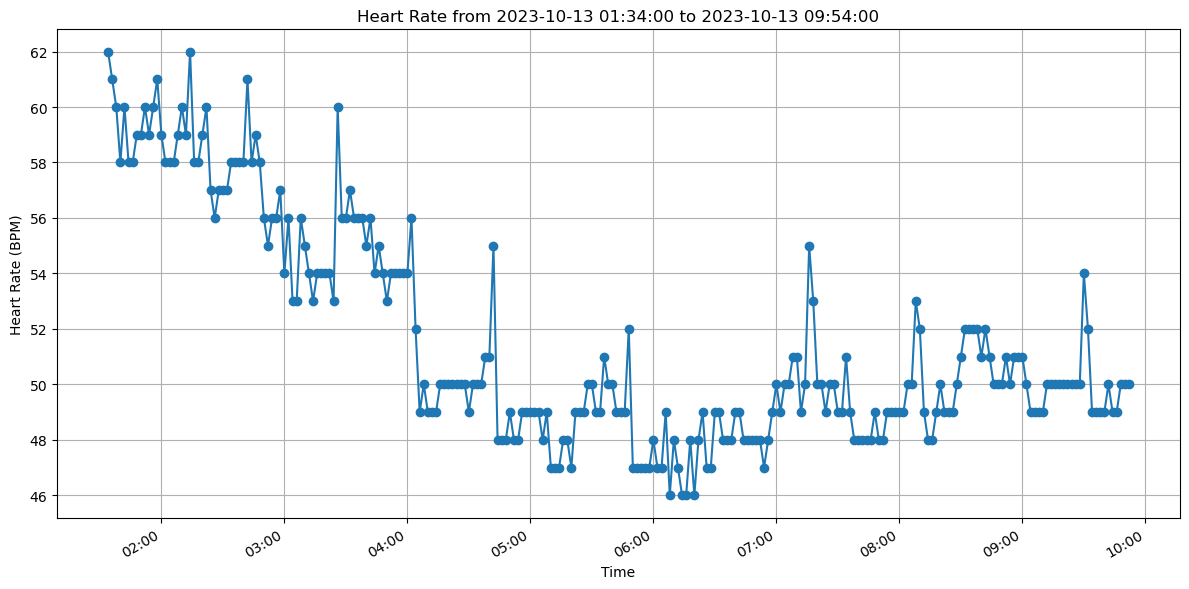

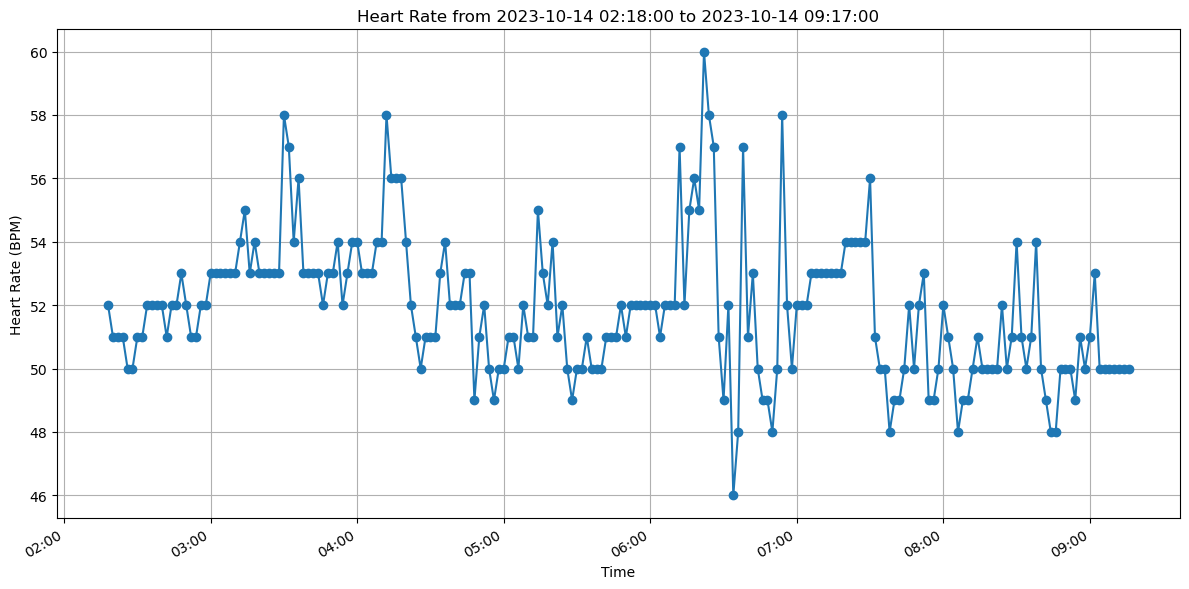

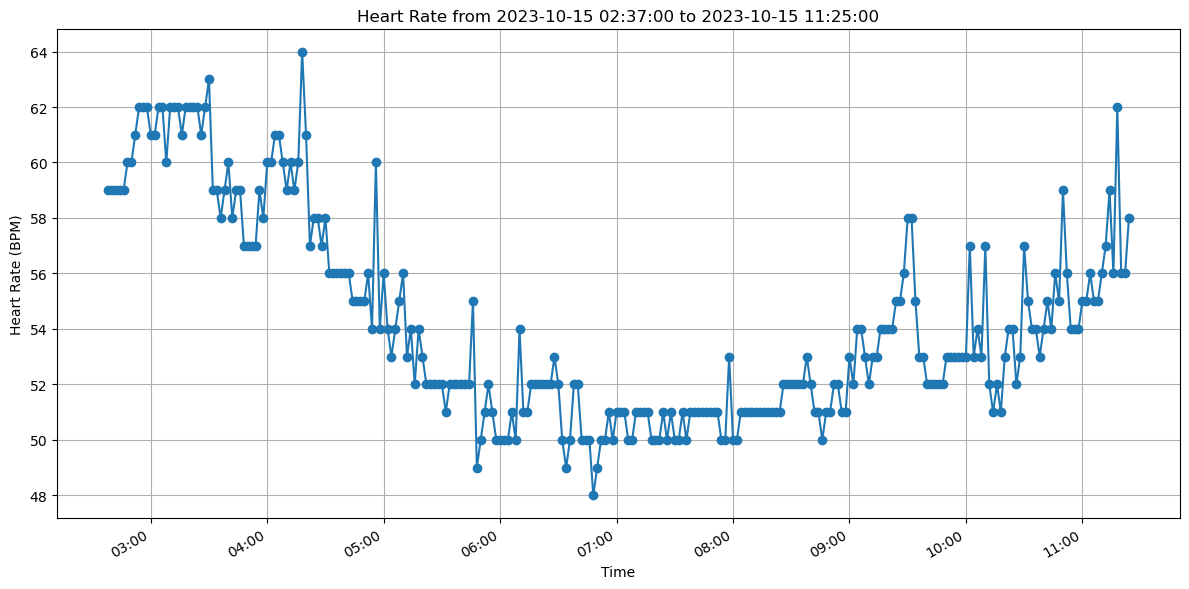

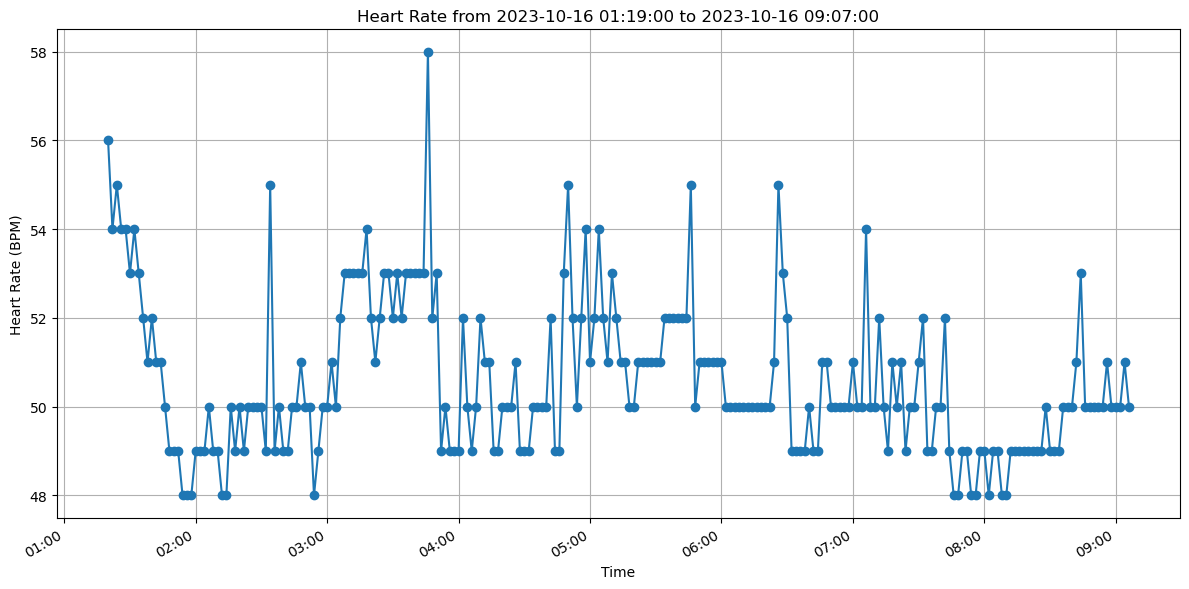

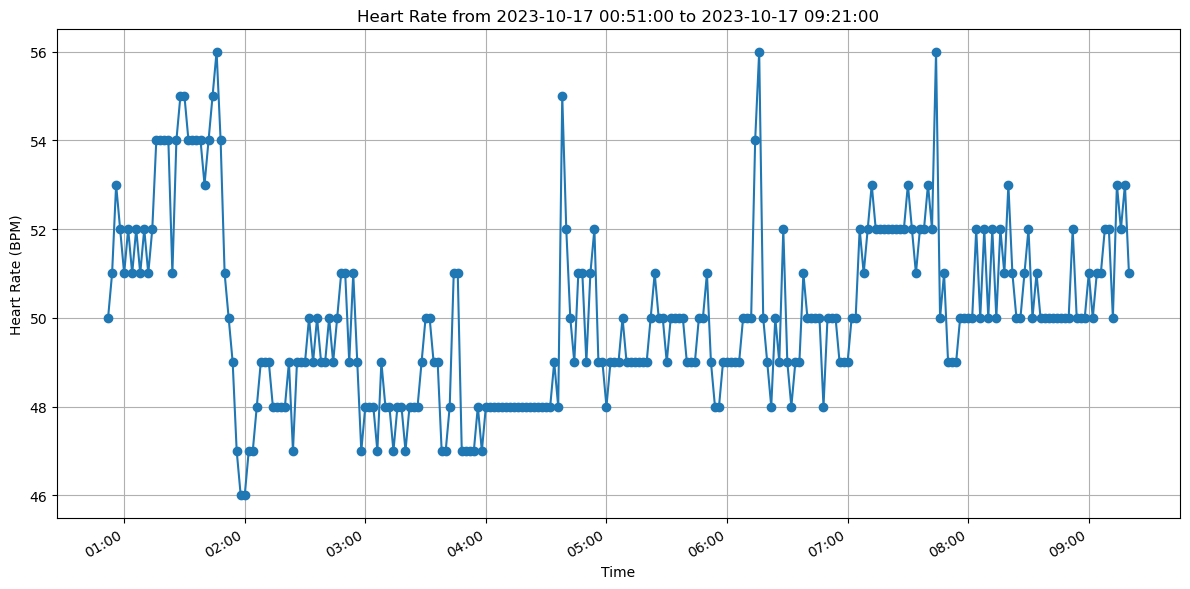

In [15]:
# Convert timestamps and adjust for local time
final_df, local_time_column = convert_timestamps(final_sleep_heart_rate_df, 'startGMT', 2)

# Extract and filter data by day
unique_days, day_dataframes = extract_and_filter_by_day(final_df, local_time_column)

# Plot daily data
plot_heart_rate_during_sleep_phases(expanded_df, final_df)

Sleep Level Plots

In [16]:

def convert_to_local_time(df, start_column, end_column, time_offset_hours=2):
    """
    Function that converts start and end timestamps in a dataframe to a timezone-aware datetime format.

    ***COULD BE OPTIMIZED IN THE convert_timestamps() function***
    """
    df[start_column] = pd.to_datetime(df[start_column])
    df[end_column] = pd.to_datetime(df[end_column])

    df["startLocal"] = df[start_column] + timedelta(hours=time_offset_hours)
    df["endLocal"] = df[end_column] + timedelta(hours=time_offset_hours)
    
    return df


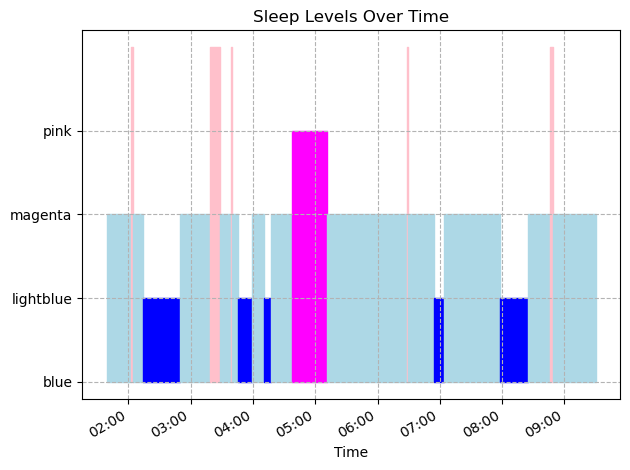

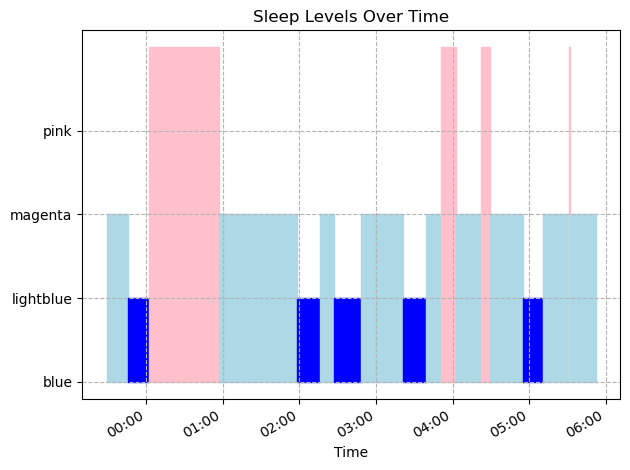

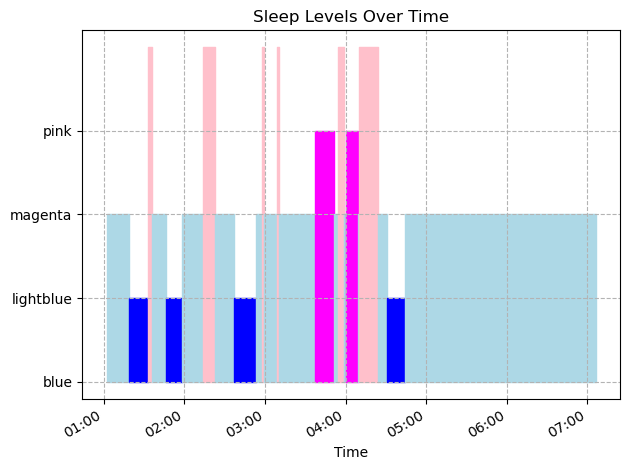

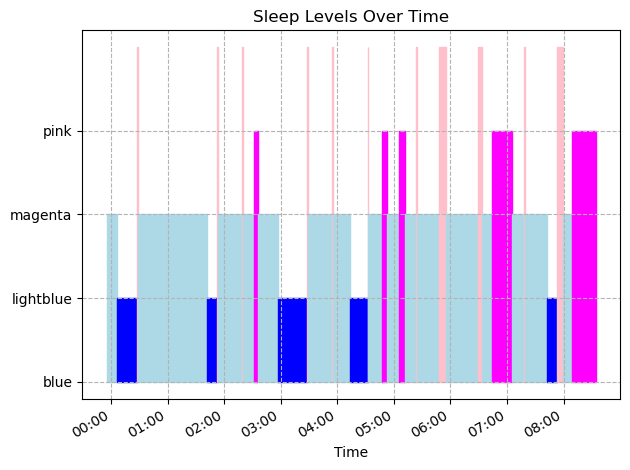

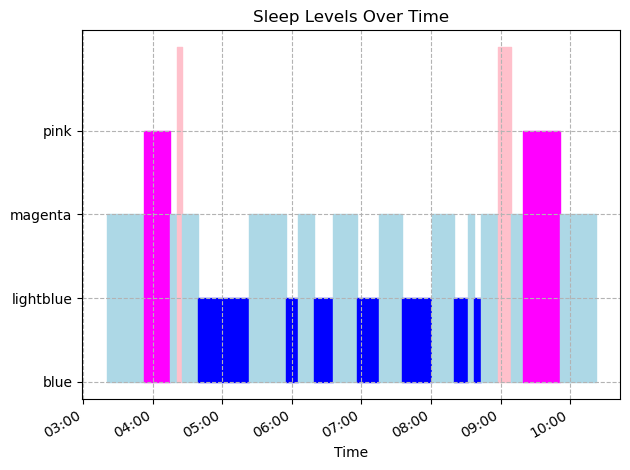

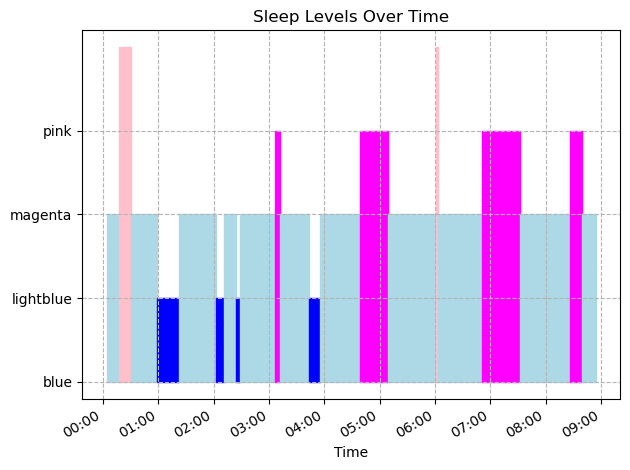

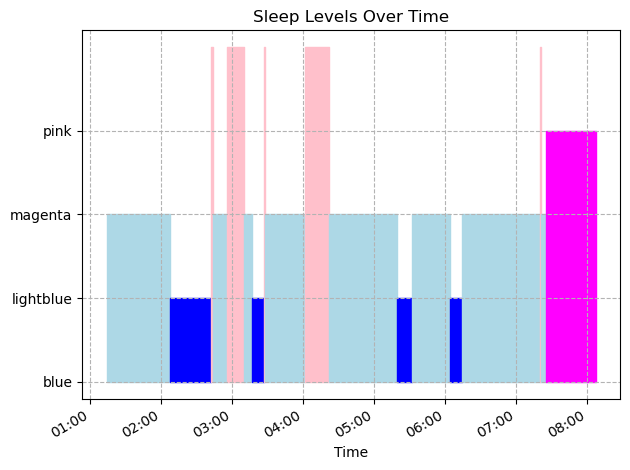

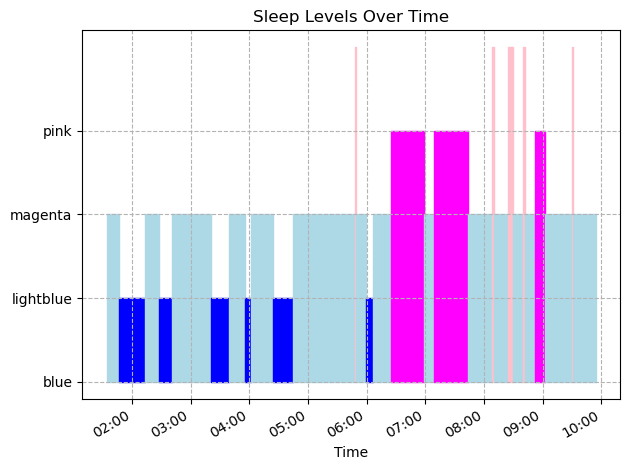

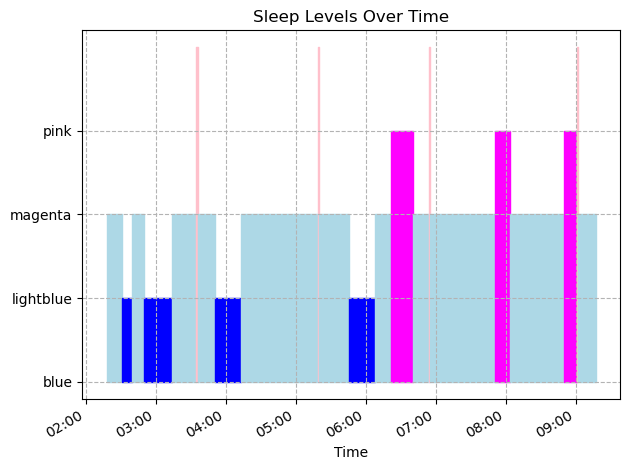

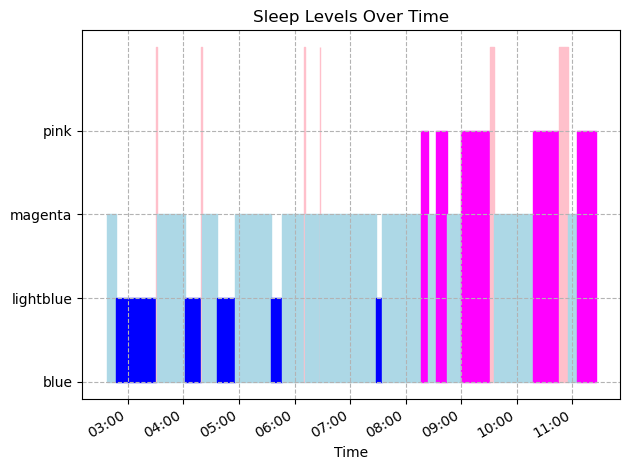

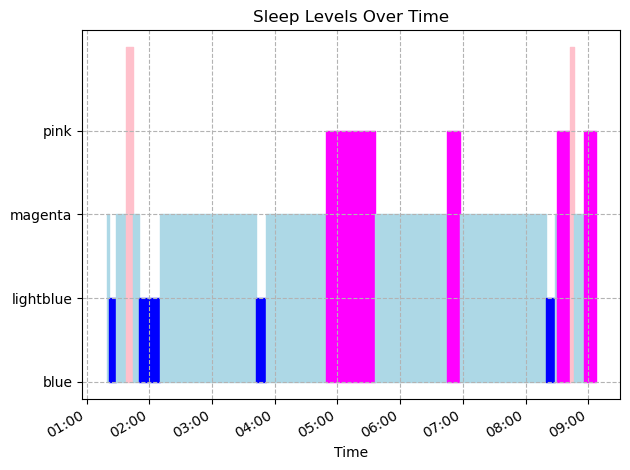

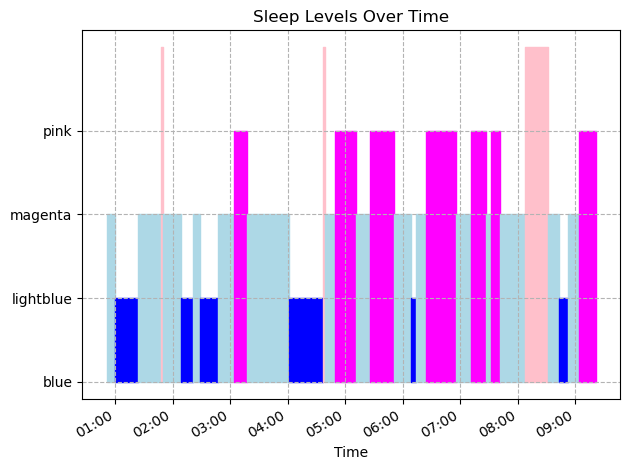

In [17]:

def plot_sleep_levels(expanded_df, sleep_levels_df, sleep_colors):
    """
    Function that plots the different sleep stages in a night across multiple nights.
    """
    for idx, row in expanded_df.iterrows():
        start_time = row['sleepStartTimestampLocal']
        end_time = row['sleepEndTimestampLocal']

        if pd.isnull(start_time) or pd.isnull(end_time):
            continue

        phase_data = sleep_levels_df[(sleep_levels_df['startLocal'] >= start_time) & (sleep_levels_df['endLocal'] <= end_time)]

        for _, sleep_row in phase_data.iterrows():
            level = sleep_row["activityLevel"]
            plt.fill_between([sleep_row["startLocal"], sleep_row["endLocal"]], 0, level + 1, color=sleep_colors[level])

        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=1))
        plt.gcf().autofmt_xdate()
        plt.title('Sleep Levels Over Time')
        plt.xlabel('Time')
        plt.yticks(list(sleep_colors.keys()), list(sleep_colors.values()))
        plt.grid(True, which="both", ls="--", c='0.7')
        plt.tight_layout()
        plt.show()
        
# Normalize and concatenate sleep levels data
sleepLevels_df = process_column_data(week_sleep_df, "sleepLevels")

# Convert GMT to local time
sleepLevels_df = convert_to_local_time(sleepLevels_df, "startGMT", "endGMT")

# Define color scheme for sleep levels
sleep_colors = {
    0.0: 'blue',    # Deep sleep
    1.0: 'lightblue',  # Light sleep
    2.0: 'magenta',  # REM sleep
    3.0: 'pink'     # Awake
}

# Plot sleep levels
plot_sleep_levels(expanded_df, sleepLevels_df, sleep_colors)


# Data Manipulation

## dailySleepDTO

Deleting entries where users did not wear the watch (id=NaN).

In [18]:
expanded_df = expanded_df.dropna(subset=["id"])
expanded_df

id  userProfilePK calendarDate  sleepTimeSeconds  \
3   1.696549e+12      116790110   2023-10-06           27360.0   
4   1.696628e+12      116790110   2023-10-07           18480.0   
5   1.696720e+12      116790110   2023-10-08           19860.0   
6   1.696802e+12      116790110   2023-10-09           29520.0   
7   1.696901e+12      116790110   2023-10-10           24420.0   
8   1.696975e+12      116790110   2023-10-11           30960.0   
9   1.697066e+12      116790110   2023-10-12           22501.0   
10  1.697154e+12      116790110   2023-10-13           29280.0   
11  1.697243e+12      116790110   2023-10-14           24900.0   
12  1.697330e+12      116790110   2023-10-15           30660.0   
13  1.697412e+12      116790110   2023-10-16           27540.0   
14  1.697497e+12      116790110   2023-10-17           28920.0   

    napTimeSeconds sleepWindowConfirmed sleepWindowConfirmationType  \
3              0.0                 True    enhanced_confirmed_final   
4              0.0                 True    enhanced_confirmed_final   
5              0.0                 True    enhanced_confirmed_final   
6              0.0                 True    enhanced_confirmed_final   
7              0.0                 True    enhanced_confirmed_final   
8              0.0                 True    enhanced_confirmed_final   
9              0.0                 True    enhanced_confirmed_final   
10             0.0                 True    enhanced_confirmed_final   
11             0.0                 True    enhanced_confirmed_final   
12             0.0                 True    enhanced_confirmed_final   
13             0.0                 True    enhanced_confirmed_final   
14             0.0                 True    enhanced_confirmed_final   

    sleepStartTimestampGMT  sleepEndTimestampGMT sleepStartTimestampLocal  \
3             1.696549e+12          1.696577e+12      2023-10-06 01:39:00   
4             1.696628e+12          1.696651e+12      2023-10-06 23:29:00   
5             1.696720e+12          1.696742e+12      2023-10-08 01:02:00   
6             1.696802e+12          1.696833e+12      2023-10-08 23:55:00   
7             1.696901e+12          1.696926e+12      2023-10-10 03:20:00   
8             1.696975e+12          1.697007e+12      2023-10-11 00:04:00   
9             1.697066e+12          1.697091e+12      2023-10-12 01:14:00   
10            1.697154e+12          1.697184e+12      2023-10-13 01:34:00   
11            1.697243e+12          1.697268e+12      2023-10-14 02:18:00   
12            1.697330e+12          1.697362e+12      2023-10-15 02:37:00   
13            1.697412e+12          1.697440e+12      2023-10-16 01:19:00   
14            1.697497e+12          1.697527e+12      2023-10-17 00:51:00   

    ... sleepScores.lightPercentage.idealStartInSeconds  \
3   ...                                          8208.0   
4   ...                                          5544.0   
5   ...                                          5958.0   
6   ...                                          8856.0   
7   ...                                          7326.0   
8   ...                                          9288.0   
9   ...                                          6750.3   
10  ...                                          8784.0   
11  ...                                          7470.0   
12  ...                                          9198.0   
13  ...                                          8262.0   
14  ...                                          8676.0   

   sleepScores.lightPercentage.idealEndInSeconds  \
3                                       17510.40   
4                                       11827.20   
5                                       12710.40   
6                                       18892.80   
7                                       15628.80   
8                                       19814.40   
9                                       14400.64   
10                                      18739

Deleting columns that are irrelevant after discussion (refer excel for justifications).

In [19]:
cols_to_delete = [
    "userProfilePK","napTimeSeconds", "sleepWindowConfirmed", "sleepQualityTypePK", "sleepWindowConfirmationType","sleepStartTimestampGMT",
    "sleepEndTimestampGMT","autoSleepStartTimestampGMT","autoSleepEndTimestampGMT","sleepResultTypePK",
    "unmeasurableSleepSeconds", "deviceRemCapable", "retro", "sleepFromDevice", "sleepScores.totalDuration.optimalStart",
    "sleepScores.totalDuration.optimalEnd", "sleepScores.stress.optimalStart", "sleepScores.stress.optimalEnd",
    "sleepScores.awakeCount.optimalStart","sleepScores.awakeCount.optimalEnd", "sleepScores.overall.qualifierKey",
    "sleepScores.remPercentage.qualifierKey", "sleepScores.remPercentage.optimalStart","sleepScores.remPercentage.optimalEnd",
    "sleepScores.restlessness.optimalStart", "sleepScores.restlessness.optimalEnd", "sleepScores.lightPercentage.qualifierKey",
    "sleepScores.lightPercentage.optimalStart", "sleepScores.lightPercentage.optimalEnd", "sleepScores.deepPercentage.qualifierKey",
    "sleepScores.deepPercentage.optimalStart","sleepScores.deepPercentage.optimalEnd"
    ]

# delete irrelevant columns
sleepDTO_df = expanded_df.drop(cols_to_delete,axis=1)
sleepDTO_df

id calendarDate  sleepTimeSeconds sleepStartTimestampLocal  \
3   1.696549e+12   2023-10-06           27360.0      2023-10-06 01:39:00   
4   1.696628e+12   2023-10-07           18480.0      2023-10-06 23:29:00   
5   1.696720e+12   2023-10-08           19860.0      2023-10-08 01:02:00   
6   1.696802e+12   2023-10-09           29520.0      2023-10-08 23:55:00   
7   1.696901e+12   2023-10-10           24420.0      2023-10-10 03:20:00   
8   1.696975e+12   2023-10-11           30960.0      2023-10-11 00:04:00   
9   1.697066e+12   2023-10-12           22501.0      2023-10-12 01:14:00   
10  1.697154e+12   2023-10-13           29280.0      2023-10-13 01:34:00   
11  1.697243e+12   2023-10-14           24900.0      2023-10-14 02:18:00   
12  1.697330e+12   2023-10-15           30660.0      2023-10-15 02:37:00   
13  1.697412e+12   2023-10-16           27540.0      2023-10-16 01:19:00   
14  1.697497e+12   2023-10-17           28920.0      2023-10-17 00:51:00   

   sleepEndTimestampLocal  deepSleepSeconds  lightSleepSeconds  \
3     2023-10-06 09:30:00            5520.0            19860.0   
4     2023-10-07 05:52:00            5340.0            13140.0   
5     2023-10-08 07:06:00            3300.0            15180.0   
6     2023-10-09 08:34:00            5460.0            20220.0   
7     2023-10-10 10:22:00            7980.0            13140.0   
8     2023-10-11 08:54:00            2940.0            22680.0   
9     2023-10-12 08:07:01            4020.0            15960.0   
10    2023-10-13 09:54:00            5460.0            19080.0   
11    2023-10-14 09:17:00            4620.0            17700.0   
12    2023-10-15 11:25:00            5820.0            18960.0   
13    2023-10-16 09:07:00            2700.0            19860.0   
14    2023-10-17 09:21:00            6300.0            14640.0   

    remSleepSeconds  awakeSleepSeconds  averageRespirationValue  ...  \
3            1980.0              900.0                     13.0  ...   
4               0.0             4500.0                     11.0  ...   
5            1380.0             1980.0                     12.0  ...   
6            3840.0             1620.0                     15.0  ...   
7            3300.0              900.0                     12.0  ...   
8            5340.0              840.0                     13.0  ...   
9            2520.0             2280.0                     14.0  ...   
10           4740.0              720.0                     14.0  ...   
11           2580.0              240.0                     12.0  ...   
12           5880.0             1020.0                     15.0  ...   
13           4980.0              540.0                     14.0  ...   
14           7980.0             1680.0                     14.0  ...   

    sleepScores.remPercentage.idealEndInSeconds  \
3                                       8481.60   
4                                       5728.80   
5                                       6156.60   
6                                       9151.20   
7                                       7570.20   
8                                       9597.60   
9                                       6975.31   
10                                      9076.80   
11                                      7719.00   
12                                      9504.60   
13                                      8537.40   
14                                      8965.20   

    sleepScores.restlessness.qualifierKey  sleepScores.lightPercentage.value  \
3                                    GOOD                               73.0   
4                                    POOR                               71.0   
5                                    FAIR                               76.0   
6                                    FAIR                               68.0   
7                                    GOOD                               54.0   
8                                    GOOD                               73.0   
9    

Convert qualifier keys that dont have redundant value columns to numerical values.

EXCELLENT : 4, GOOD : 3, FAIR : 2, POOR : 1

The columns are replaced with their respective converted columns. 

In [20]:
def convert_num(input_value):
    """
    Function that converts the string qualifiers to numerical value.  
    """
    score_dict = {"EXCELLENT": 4, "GOOD" : 3, "FAIR" : 2, "POOR" : 1}
    for key,value in score_dict.items():
        if input_value == key:
            input_value = value
        else:
            pass
    return input_value

In [21]:
for col in sleepDTO_df.columns:
    if col.endswith("qualifierKey"):
        new_name = col.replace("qualifierKey","value")
        sleepDTO_df[new_name] = sleepDTO_df[col].apply(convert_num)
        sleepDTO_df.drop(col,axis=1,inplace=True)
sleepDTO_df

id calendarDate  sleepTimeSeconds sleepStartTimestampLocal  \
3   1.696549e+12   2023-10-06           27360.0      2023-10-06 01:39:00   
4   1.696628e+12   2023-10-07           18480.0      2023-10-06 23:29:00   
5   1.696720e+12   2023-10-08           19860.0      2023-10-08 01:02:00   
6   1.696802e+12   2023-10-09           29520.0      2023-10-08 23:55:00   
7   1.696901e+12   2023-10-10           24420.0      2023-10-10 03:20:00   
8   1.696975e+12   2023-10-11           30960.0      2023-10-11 00:04:00   
9   1.697066e+12   2023-10-12           22501.0      2023-10-12 01:14:00   
10  1.697154e+12   2023-10-13           29280.0      2023-10-13 01:34:00   
11  1.697243e+12   2023-10-14           24900.0      2023-10-14 02:18:00   
12  1.697330e+12   2023-10-15           30660.0      2023-10-15 02:37:00   
13  1.697412e+12   2023-10-16           27540.0      2023-10-16 01:19:00   
14  1.697497e+12   2023-10-17           28920.0      2023-10-17 00:51:00   

   sleepEndTimestampLocal  deepSleepSeconds  lightSleepSeconds  \
3     2023-10-06 09:30:00            5520.0            19860.0   
4     2023-10-07 05:52:00            5340.0            13140.0   
5     2023-10-08 07:06:00            3300.0            15180.0   
6     2023-10-09 08:34:00            5460.0            20220.0   
7     2023-10-10 10:22:00            7980.0            13140.0   
8     2023-10-11 08:54:00            2940.0            22680.0   
9     2023-10-12 08:07:01            4020.0            15960.0   
10    2023-10-13 09:54:00            5460.0            19080.0   
11    2023-10-14 09:17:00            4620.0            17700.0   
12    2023-10-15 11:25:00            5820.0            18960.0   
13    2023-10-16 09:07:00            2700.0            19860.0   
14    2023-10-17 09:21:00            6300.0            14640.0   

    remSleepSeconds  awakeSleepSeconds  averageRespirationValue  ...  \
3            1980.0              900.0                     13.0  ...   
4               0.0             4500.0                     11.0  ...   
5            1380.0             1980.0                     12.0  ...   
6            3840.0             1620.0                     15.0  ...   
7            3300.0              900.0                     12.0  ...   
8            5340.0              840.0                     13.0  ...   
9            2520.0             2280.0                     14.0  ...   
10           4740.0              720.0                     14.0  ...   
11           2580.0              240.0                     12.0  ...   
12           5880.0             1020.0                     15.0  ...   
13           4980.0              540.0                     14.0  ...   
14           7980.0             1680.0                     14.0  ...   

    sleepScores.lightPercentage.idealEndInSeconds  \
3                                        17510.40   
4                                        11827.20   
5                                        12710.40   
6                                        18892.80   
7                                        15628.80   
8                                        19814.40   
9                                        14400.64   
10                                       18739.20   
11                                       15936.00   
12                                       19622.40   
13                                       17625.60   
14                                       18508.80   

    sleepScores.deepPercentage.value  \
3                               20.0   
4                               29.0   
5                               17.0   
6                               18.0   
7                               33.0   
8                                9.0   
9                               18.0   
10                              19.0   
11                              19.0   
12                              19.0   
13                              10.0   
14                              22.0   

    sleepScores.de

In [22]:
sleepDTO_df.columns

Index(['id', 'calendarDate', 'sleepTimeSeconds', 'sleepStartTimestampLocal',
       'sleepEndTimestampLocal', 'deepSleepSeconds', 'lightSleepSeconds',
       'remSleepSeconds', 'awakeSleepSeconds', 'averageRespirationValue',
       'lowestRespirationValue', 'highestRespirationValue', 'awakeCount',
       'avgSleepStress', 'ageGroup', 'sleepScoreFeedback', 'sleepScoreInsight',
       'sleepVersion', 'sleepScores.overall.value',
       'sleepScores.remPercentage.value',
       'sleepScores.remPercentage.idealStartInSeconds',
       'sleepScores.remPercentage.idealEndInSeconds',
       'sleepScores.lightPercentage.value',
       'sleepScores.lightPercentage.idealStartInSeconds',
       'sleepScores.lightPercentage.idealEndInSeconds',
       'sleepScores.deepPercentage.value',
       'sleepScores.deepPercentage.idealStartInSeconds',
       'sleepScores.deepPercentage.idealEndInSeconds',
       'sleepScorePersonalizedInsight', 'userNote',
       'sleepScores.totalDuration.value', 'sleepScor

Columns to reconsider.

In [23]:
yellow_cols = ["ageGroup", "sleepScoreFeedback", "sleepScoreInsight","sleepVersion",
               "sleepScores.lightPercentage.idealStartInSeconds", "sleepScores.lightPercentage.idealEndInSeconds",
               "sleepScores.deepPercentage.idealStartInSeconds", "sleepScores.deepPercentage.idealEndInSeconds"]

## Time Series / Feature Vectors

Recording frequencies:

- sleepMovement: 60 seconds -------------------------------> datetime one day delayed?
- remSleepData: bool for each night
- sleepLevels: 60 seconds
- sleepRestlessMoments: 60 seconds
- restlessMomentsCount: one value for each night
- wellnessEpochRespirationDataDTOList: 60 seconds
- sleepHeartRate: 120 seconds
- sleepStress: 180 seconds
- sleepBodyBattery: 180 seconds
- hrvData: 300 seconds
- avgOvernightHrv: one value for each night
- hrvStatus: None
- restingHeartRate: one value for each night


Timeseries data in expanded_df:
- sleepMovement, sleepLevels, sleepRestlessMoments, welnessEpochRespirationDataDTOList, sleepHeartRate,sleepStress, sleepBodyBattery, hrvData

Constant values in expanded_df: 
- remSleepData, restlessMomentsCount, avgOvernightHrv, hrvStatus(?), restingHeartRate

expanded_df["dailySleepDTO"]: extraction of time series data and feature data with different functions.

In [24]:
def delete_untracked_nights(df):
    """
    Delete the untracked nights by using the restlessMomentsCount.
    This is because restless moments are only registered in the watch when sleep is detected.
    """
    return df.dropna(subset=["restlessMomentsCount"]).reset_index(drop=True) # reset the index

In [25]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [26]:
week_sleep_df = delete_untracked_nights(week_sleep_df)
week_sleep_df

dailySleepDTO  \
0   {'id': 1696549140000, 'userProfilePK': 1167901...   
1   {'id': 1696627740000, 'userProfilePK': 1167901...   
2   {'id': 1696719720000, 'userProfilePK': 1167901...   
3   {'id': 1696802100000, 'userProfilePK': 1167901...   
4   {'id': 1696900800000, 'userProfilePK': 1167901...   
5   {'id': 1696975440000, 'userProfilePK': 1167901...   
6   {'id': 1697066040000, 'userProfilePK': 1167901...   
7   {'id': 1697153640000, 'userProfilePK': 1167901...   
8   {'id': 1697242680000, 'userProfilePK': 1167901...   
9   {'id': 1697330220000, 'userProfilePK': 1167901...   
10  {'id': 1697411940000, 'userProfilePK': 1167901...   
11  {'id': 1697496660000, 'userProfilePK': 1167901...   

                                        sleepMovement remSleepData  \
0   [{'startGMT': '2023-10-05T22:39:00.0', 'endGMT...         True   
1   [{'startGMT': '2023-10-06T20:29:00.0', 'endGMT...         True   
2   [{'startGMT': '2023-10-07T22:02:00.0', 'endGMT...         True   
3   [{'startGMT': '2023-10-08T20:55:00.0', 'endGMT...         True   
4   [{'startGMT': '2023-10-10T00:20:00.0', 'endGMT...         True   
5   [{'startGMT': '2023-10-10T21:04:00.0', 'endGMT...         True   
6   [{'startGMT': '2023-10-11T22:14:00.0', 'endGMT...         True   
7   [{'startGMT': '2023-10-12T22:34:00.0', 'endGMT...         True   
8   [{'startGMT': '2023-10-13T23:18:00.0', 'endGMT...         True   
9   [{'startGMT': '2023-10-14T23:37:00.0', 'endGMT...         True   
10  [{'startGMT': '2023-10-15T22:19:00.0', 'endGMT...         True   
11  [{'startGMT': '2023-10-16T21:51:00.0', 'endGMT...         True   

                                          sleepLevels  \
0   [{'startGMT': '2023-10-05T23:39:00.0', 'endGMT...   
1   [{'startGMT': '2023-10-06T21:29:00.0', 'endGMT...   
2   [{'startGMT': '2023-10-07T23:02:00.0', 'endGMT...   
3   [{'startGMT': '2023-10-08T21:55:00.0', 'endGMT...   
4   [{'startGMT': '2023-10-10T01:20:00.0', 'endGMT...   
5   [{'startGMT': '2023-10-10T22:04:00.0', 'endGMT...   
6   [{'startGMT': '2023-10-11T23:14:00.0', 'endGMT...   
7   [{'startGMT': '2023-10-12T23:34:00.0', 'endGMT...   
8   [{'startGMT': '2023-10-14T00:18:00.0', 'endGMT...   
9   [{'startGMT': '2023-10-15T00:37:00.0', 'endGMT...   
10  [{'startGMT': '2023-10-15T23:19:00.0', 'endGMT...   
11  [{'startGMT': '2023-10-16T22:51:00.0', 'endGMT...   

                                 sleepRestlessMoments  restlessMomentsCount  \
0   [{'value': 1, 'startGMT': 1696550400000}, {'va...                  52.0   
1   [{'value': 1, 'startGMT': 1696629540000}, {'va...                  24.0   
2   [{'value': 1, 'startGMT': 1696720260000}, {'va...                  43.0   
3   [{'value': 1, 'startGMT': 1696802100000}, {'va...                  42.0   
4   [{'value': 1, 'startGMT': 1696901520000}, {'va...                  29.0   
5   [{'value': 1, 'startGMT': 1696975980000}, {'va...                  47.0   
6   [{'value': 1, 'startGMT': 1697066040000}, {'va...                  45.0   
7   [{'value': 1, 'startGMT': 1697153640000}, {'va...                  55.0   
8   [{'value': 1, 'startGMT': 1697242680000}, {'va...                  49.0   
9   [{'value': 1, 'startGMT': 1697330220000}, {'va...                  67.0   
10  [{'value': 3, 'startGMT': 1697412840000}, {'va...                  44.0   
11  [{'value': 1, 'startGMT': 1697497020000}, {'va...                  54.0   

                  wellnessEpochRespirationDataDTOList  \
0   [{'startTimeGMT': 1696549140000, 'respirationV...   
1   [{'startTimeGMT': 1696627740000, 'respirationV...   
2   [{'startTimeGMT': 1696719720000, 'respirationV...   
3   [{'startTimeGMT': 1696802100000, 'respirationV...   
4   [{'startTimeGMT': 1696900800000, 'respirationV...   
5   [{'startTimeGMT': 1696975440000, 'respirationV...   
6   [{'startTimeGMT': 1697066040000, 'respirationV...   
7   [{'startTimeGMT': 1697153640000, 'respirationV...   
8   [{'startTimeGMT': 1697242680000, 'respirationV...   
9   [{'startTimeGMT': 1697330220000, 'respirati

Iterate over week_sleep_df Dataframe, extract values, resample and write them in a DataFrame/Numpy Array with a time series values as columns.

Used values : 
- sleepRestlessMoments
- hrvData
- sleepBodyBattery
- sleepStress
- sleepHeartRate 
- wellnessEpochRespirationDTOList
- sleep Levels

hrvStatus was excluded since it's only value is "None"

In [27]:
import datetime


def featurevector_timeseries(week_sleep_df):
    """
    Function that returns the time-sensitive readings from the watch as feature vectors in form of pandas dataframe and numpy array.
    The columns that are processed together are done so due to their common format.
    -    startGMT: sleepRestlessMoments, hrvData, sleepBodyBattery, sleepStress, sleepHeartRate
    -    startTimeGMT: welnessEpochRespirationDataDTOList
    -    startGMT - endGMT: sleepLevels
    """

    #preliminary_featurevector_allnights = pd.DataFrame()
    preliminary_featurevector_allnights = pd.DataFrame(index=["sleepRestlessMoments", "hrvData", "sleepStress", "sleepBodyBattery", "sleepHeartRate", "wellnessEpochRespirationDataDTOList", "sleepLevels"])
    # iterate over indeces of week_sleep_df to only process one day at a time

    for i in week_sleep_df.index:
        # initialize empty Dataframe. This will be filled line by line with each iteration, adding a different feature in each row
        preliminary_featurevector = pd.DataFrame()
        sleep_one_day = week_sleep_df.iloc[i]
        # columns that use "startGMT" as name for their timecolumn
        columns_startGMT = ["sleepRestlessMoments", "hrvData", "sleepStress", "sleepBodyBattery", "sleepHeartRate"]

        # iterate over different columns
        for c in columns_startGMT:
            column_df = [pd.json_normalize(item) for item in sleep_one_day[c]]
            column_df = pd.concat(column_df, ignore_index=True)
            
            column_df["Real Time"] = [datetime.datetime.fromtimestamp(i) for i in column_df["startGMT"] / 1000]
            column_df["Real Time"] = pd.to_datetime(column_df["Real Time"])
            # make Real Time the index of the dataframe
            column_df.index = column_df["Real Time"]
            del column_df["Real Time"]
            del column_df["startGMT"]
            column_df = column_df.rename(columns = {column_df.columns[0]: c})
                    
            # resample: insert timesteps for each minute
            column_df_interpolate = column_df.resample('T').mean()
            # interpolate values to fill the new, empty time steps
            column_df_interpolate[c] = column_df_interpolate[c].interpolate()
            # drop unneeded columns, swap axes
            column_df_interpolate_transposed = column_df_interpolate.T
            # add to feature vector
            preliminary_featurevector = pd.concat([preliminary_featurevector, column_df_interpolate_transposed], axis=0)

            
        # sleep_one_day["wellnessEpochRespirationDataDTOList"] uses "startTimeGMT" as name for their time columns, so it has to be processed separately
        wellnessEpochRespiration_df = [pd.json_normalize(item) for item in sleep_one_day["wellnessEpochRespirationDataDTOList"]]
        wellnessEpochRespiration_df = pd.concat(wellnessEpochRespiration_df, ignore_index=True)
        
        wellnessEpochRespiration_df["Real Time"] = [datetime.datetime.fromtimestamp(i) for i in wellnessEpochRespiration_df["startTimeGMT"] / 1000]
        wellnessEpochRespiration_df["Real Time"] = pd.to_datetime(wellnessEpochRespiration_df["Real Time"])
        wellnessEpochRespiration_df.index = wellnessEpochRespiration_df["Real Time"]
        del wellnessEpochRespiration_df["Real Time"]
        del wellnessEpochRespiration_df["startTimeGMT"]
        wellnessEpochRespiration_df = wellnessEpochRespiration_df.rename(columns = {wellnessEpochRespiration_df.columns[0]: "wellnessEpochRespirationDataDTOList"})
        
        wellnessEpochRespiration_df_interpolate = wellnessEpochRespiration_df.resample('T').mean()
        wellnessEpochRespiration_df_interpolate['wellnessEpochRespirationDataDTOList'] = wellnessEpochRespiration_df_interpolate['wellnessEpochRespirationDataDTOList'].interpolate()
        wellnessEpochRespiration_df_interpolate_transposed = wellnessEpochRespiration_df_interpolate.T
        preliminary_featurevector = pd.concat([preliminary_featurevector, wellnessEpochRespiration_df_interpolate_transposed], axis=0)


        # in sleep_one_day['sleepLevels'] the sleep levels are displayed in intervalls from startGMT to endGMT
        # .ffil was used for forward filling, so that all timesteps (per minute) in the interval would have the same value
        sleepLevels_df = [pd.json_normalize(item) for item in sleep_one_day['sleepLevels']]
        sleepLevels_df = pd.concat(sleepLevels_df, ignore_index=True)
        
        sleepLevels_df["startGMT"] = pd.to_datetime(sleepLevels_df["startGMT"])
        sleepLevels_df.index = sleepLevels_df["startGMT"]
        del sleepLevels_df["startGMT"]
        del sleepLevels_df["endGMT"]
        sleepLevels_df = sleepLevels_df.rename(columns = {sleepLevels_df.columns[0]: "sleepLevels"})
        #.ffil -> forward fill, replace all NaN values with the last numeric value that occured
        sleepLevels_ffil = sleepLevels_df.resample("T").ffill()
        sleepLevels_ffil = sleepLevels_ffil.T
        preliminary_featurevector = pd.concat([preliminary_featurevector, sleepLevels_ffil], axis=0)
        preliminary_featurevector_allnights = preliminary_featurevector_allnights.merge(preliminary_featurevector, left_index=True, right_index=True)
        

    # replace all NaNs with 0
    preliminary_featurevector_allnights = preliminary_featurevector_allnights.fillna(0)
    # convert to numpy for usage as feature vector
    preliminary_featurevector_allnights_np = preliminary_featurevector_allnights.to_numpy()

    return preliminary_featurevector_allnights, preliminary_featurevector_allnights_np

In [28]:
featurevector_timeseries_pandas, featurevector_timeseries_numpy = featurevector_timeseries(week_sleep_df)

In [29]:
featurevector_timeseries_pandas

2023-10-05 23:39:00  2023-10-05 23:40:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-10-05 23:41:00  2023-10-05 23:42:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-10-05 23:43:00  2023-10-05 23:44:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-10-05 23:45:00  2023-10-05 23:46:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-10-05 23:47:00  2023-10-05 23:48:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-10-05 23:49:00  2023-10-05 23:50:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-10-05 23:51:00  2023-10-05 23:52:00  \
sleepRestlessMoments                                 0.0      

In [30]:
featurevector_timeseries_numpy

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 33., 31., 29.],
       [ 0.,  0.,  0., ..., 23.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 53., 52., 51.],
       [ 0.,  0.,  0., ..., 13., 13., 13.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

In [31]:
from save_load import save_pkl

save_pkl(featurevector_timeseries_numpy,"featurevector_timeseries_array.pkl")

Extract Static values

In [32]:
def featurevector_staticvalues(week_sleep_df):
    """
    Function that returns the static values (values that are the same everyday) as dataframe and numpy arrays.
    """
    preliminary_featurevector_allnights_staticvalues = pd.DataFrame(index=["remSleepData", "restlessMomentsCount", "avgOvernightHrv", "restingHeartRate"])
    for i in week_sleep_df.index:
        # initialize empty Dataframe. This will be filled line by line with each iteration, adding a different feature in each row
        preliminary_featurevector_static = pd.DataFrame()
        sleep_one_day = week_sleep_df.iloc[i]
        # columns that have one single value for the whole night
        static_columns = ["remSleepData", "restlessMomentsCount", "avgOvernightHrv", "restingHeartRate"]
    # add the features with static values
        data = []
        for s in static_columns:
            value = sleep_one_day[s]
            data.append(value)
            df = pd.DataFrame(data, columns=[i])
        counter = 0
        for d in static_columns:
            df = df.rename(index={(counter): d})
            counter = counter+1
            
        preliminary_featurevector_allnights_staticvalues = preliminary_featurevector_allnights_staticvalues.merge(df, left_index=True, right_index=True)
        preliminary_featurevector_allnights_staticvalues_np = preliminary_featurevector_allnights_staticvalues.to_numpy()

    return preliminary_featurevector_allnights_staticvalues, preliminary_featurevector_allnights_staticvalues_np

In [33]:
featurevector_staticvalues_pandas, featurevector_staticvalues_numpy = featurevector_staticvalues(week_sleep_df)

In [34]:
featurevector_staticvalues_pandas

0     1     2     3     4     5     6     7     8   \
remSleepData          True  True  True  True  True  True  True  True  True   
restlessMomentsCount  52.0  24.0  43.0  42.0  29.0  47.0  45.0  55.0  49.0   
avgOvernightHrv       60.0  62.0  60.0  47.0  51.0  59.0  55.0  52.0  63.0   
restingHeartRate      48.0  50.0  54.0  52.0  49.0  47.0  51.0  47.0  50.0   

                        9     10    11  
remSleepData          True  True  True  
restlessMomentsCount  67.0  44.0  54.0  
avgOvernightHrv       54.0  56.0  49.0  
restingHeartRate      50.0  48.0  47.0

In [35]:
featurevector_staticvalues_numpy

array([[True, True, True, True, True, True, True, True, True, True, True,
        True],
       [52.0, 24.0, 43.0, 42.0, 29.0, 47.0, 45.0, 55.0, 49.0, 67.0, 44.0,
        54.0],
       [60.0, 62.0, 60.0, 47.0, 51.0, 59.0, 55.0, 52.0, 63.0, 54.0, 56.0,
        49.0],
       [48.0, 50.0, 54.0, 52.0, 49.0, 47.0, 51.0, 47.0, 50.0, 50.0, 48.0,
        47.0]], dtype=object)

In [36]:
save_pkl(featurevector_staticvalues_numpy,"featurevector_staticvalues_numpy.pkl")